In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/LEARNING/Python Project/firedetection/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/LEARNING/Python Project/firedetection/alarm-sound.mp3
/LEARNING/Python Project/firedetection/frame.jpg
/LEARNING/Python Project/firedetection/model.h5
/LEARNING/Python Project/firedetection/notebook2e23987adf-1d2be0.ipynb
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.1.png
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.10.png
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.100.png
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.101.png
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.102.png
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.103.png
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.104.png
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.105.png
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.106.png
/LEARNING/Python Project/firedetection/fire_dataset\fire_images\fire.107.png
/LEARNING/

In [2]:
import glob
import cv2
import matplotlib.pyplot as plt
import random
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
fire_img = glob.glob('fire_dataset/fire_images/*')


In [4]:
non_fire_img = glob.glob('fire_dataset/non_fire_images/*')



In [5]:
print(len(fire_img),len(non_fire_img))

755 243


Text(0.5, 1.0, 'FIRE IMAGE')

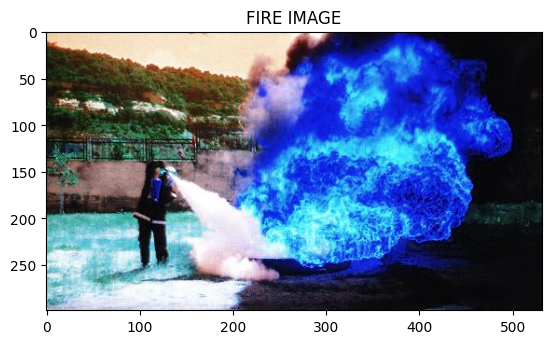

In [6]:
f_img = cv2.imread(fire_img[130])
plt.imshow(f_img)
plt.title("FIRE IMAGE")

Text(0.5, 1.0, 'NON - FIRE IMAGE')

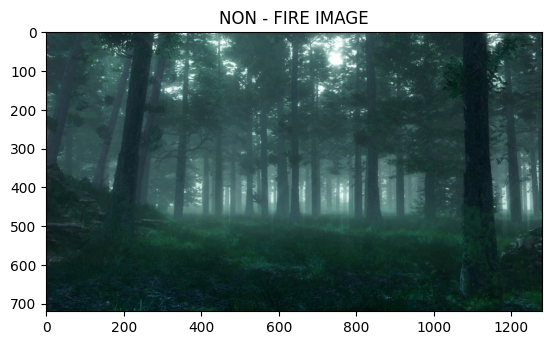

In [7]:
nf_img = cv2.imread(non_fire_img[189])
plt.imshow(nf_img)
plt.title("NON - FIRE IMAGE")

In [8]:
fire_list = []
non_fire_list = []
for img in fire_img:
    fire_list.append([img,1])
for img in non_fire_img:
    non_fire_list.append([img,0])
    
all_img_list = fire_list + non_fire_list
random.shuffle(all_img_list)


In [9]:
df = pd.DataFrame(all_img_list, columns = ['img_data', 'result'])
df.tail(10)

,img_data,result
988,fire_dataset/fire_images\fire.745.png,1
989,fire_dataset/fire_images\fire.137.png,1
990,fire_dataset/fire_images\fire.325.png,1
991,fire_dataset/fire_images\fire.94.png,1
992,fire_dataset/non_fire_images\non_fire.91.png,0
993,fire_dataset/fire_images\fire.407.png,1
994,fire_dataset/fire_images\fire.714.png,1
995,fire_dataset/fire_images\fire.322.png,1
996,fire_dataset/fire_images\fire.257.png,1
997,fire_dataset/non_fire_images\non_fire.190.png,0


In [10]:
def preprocessing_image(filepath):
    img = cv2.imread(filepath)
    
    if img is not None:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB
        img = cv2.resize(img, (160, 160))  # Resize
        img = img / 255.0  # Normalize pixel values
        return img
    else:
        print(f"Error loading image from {filepath}")
        return None


In [11]:
def preprocesses_dataset(df):
    X = []
    Y = []
    
    for img, target in df.values:
        processed_img = preprocessing_image(img)
        
        if processed_img is not None:
            X.append(processed_img)
            Y.append(target)       
            
    return np.array(X), np.array(Y)


In [12]:
X, y = preprocesses_dataset(df)

In [13]:
X.shape,y.shape

((998, 160, 160, 3), (998,))

In [14]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((668, 160, 160, 3), (668,), (330, 160, 160, 3), (330,))

In [15]:
# Define a simple CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [16]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [17]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=32)


Epoch 1/10
21/21 [==============================] - 12s 543ms/step - loss: 0.5896 - accuracy: 0.8024 - val_loss: 0.1965 - val_accuracy: 0.9212
Epoch 2/10
21/21 [==============================] - 12s 573ms/step - loss: 0.1919 - accuracy: 0.9192 - val_loss: 0.1111 - val_accuracy: 0.9545
Epoch 3/10
21/21 [==============================] - 11s 541ms/step - loss: 0.1534 - accuracy: 0.9371 - val_loss: 0.1020 - val_accuracy: 0.9606
Epoch 4/10
21/21 [==============================] - 12s 589ms/step - loss: 0.1054 - accuracy: 0.9686 - val_loss: 0.0874 - val_accuracy: 0.9636
Epoch 5/10
21/21 [==============================] - 13s 618ms/step - loss: 0.0718 - accuracy: 0.9746 - val_loss: 0.0887 - val_accuracy: 0.9667
Epoch 6/10
21/21 [==============================] - 12s 596ms/step - loss: 0.0573 - accuracy: 0.9805 - val_loss: 0.1039 - val_accuracy: 0.9667
Epoch 7/10
21/21 [==============================] - 13s 625ms/step - loss: 0.0450 - accuracy: 0.9820 - val_loss: 0.1253 - val_accuracy: 0.9606

In [18]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)


11/11 [==============================] - 1s 130ms/step - loss: 0.1077 - accuracy: 0.9636
Test Loss: 0.10772793740034103
Test Accuracy: 0.9636363387107849


In [19]:
# Generate predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions

11/11 [==============================] - 2s 132ms/step


In [20]:
# Generate a classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92        72
           1       0.98      0.97      0.98       258

    accuracy                           0.96       330
   macro avg       0.94      0.95      0.95       330
weighted avg       0.96      0.96      0.96       330



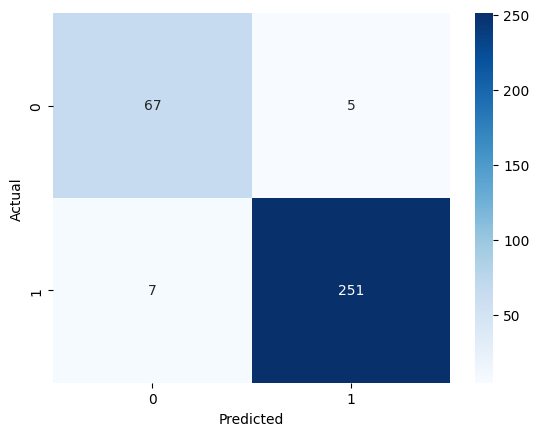

In [21]:
# Generate a confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [22]:
model.save('model.h5')

C:\Users\adars\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [24]:
# Load the saved model
model = load_model('model.h5')

In [25]:
pip install pygame

Note: you may need to restart the kernel to use updated packages.


In [26]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [27]:
def detect_fire_in_image(image_path, model):
    # Load the image
    img = cv2.imread(image_path)
    # Preprocess the image
    img = preprocessing_image(image_path)
    # Reshape the image to match the model's input shape
    img = np.expand_dims(img, axis=0)
    # Make predictions using the model
    prediction = model.predict(img)
    # Convert the prediction to a binary result (fire or non-fire)
    result = "Fire" if prediction > 0.5 else "Non-Fire"
    return result

In [28]:
# Specify the path to your model
model_path = "model.h5"


In [29]:
# Load your trained model
model = tf.keras.models.load_model(model_path)

In [30]:
image_path = "fire_dataset/non_fire_images/non_fire.5.png"
prediction = detect_fire_in_image(image_path, model)
print(f"The image is classified as: {prediction}")


1/1 [==============================] - 0s 129ms/step
The image is classified as: Non-Fire


In [31]:
def play_alarm_sound_function(sound_path):
    pygame.mixer.init()
    pygame.mixer.music.load(sound_path)
    pygame.mixer.music.play()

In [37]:
import cv2
import threading
import time
import playsound as playsound_module  # Renamed the playsound module
import pygame

def play_alarm_sound_function():
    pygame.mixer.init()
    pygame.mixer.music.load('alarm-sound.mp3')
    pygame.mixer.music.play()
    pygame.time.wait(3000)  # Wait for the sound to finish (adjust as needed)
    pygame.mixer.quit()

# Rest of your code...


# Load the pre-trained model
 # Assuming you have a function to load your trained model
model = tf.keras.models.load_model(model_path)


def detect_fire_in_image(image_path, model):
    # Preprocess the image (assuming you have a preprocessing function)
    preprocessed_img = preprocessing_image(image_path) 
    
    if preprocessed_img is not None:
        # Make prediction using your model
        prediction = model.predict(preprocessed_img.reshape(1, 160, 160, 3))
        return prediction
    else:
        return None

# def play_alarm_sound_function():
#     while True:
#         playsound_module.playsound('alarm-sound.mp3')

def process_video_feed():
    # Initialize video capture
    cap = cv2.VideoCapture(0)  # Use 0 for default webcam, or specify video file path

    while True:
        ret, frame = cap.read()  # Read a frame from the video feed

        if not ret:
            print("Failed to capture frame")
            break

        # Perform your fire detection on the frame
        # For example, you can save the frame as an image and use your detect_fire_in_image function
        cv2.imwrite("frame.jpg", frame)
        prediction = detect_fire_in_image("frame.jpg", model)

        # Display the frame
        cv2.imshow("Video Feed", frame)

        if prediction is not None:
    
            if prediction >= 0.99:
                print("The image is detected as: Fire")
                threading.Thread(target=play_alarm_sound_function).start()
                time.sleep(2)
            else:
                print("The Image is detected as NON FIRE")


        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and close any open windows
    cap.release()
    cv2.destroyAllWindows()

# Call the function to process video feed
process_video_feed()


pygame 2.5.2 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html
1/1 [==============================] - 0s 75ms/step
The Image is detected as NON FIRE
1/1 [==============================] - 0s 28ms/step
The Image is detected as NON FIRE
1/1 [==============================] - 0s 35ms/step
The Image is detected as NON FIRE
1/1 [==============================] - 0s 26ms/step
The Image is detected as NON FIRE
1/1 [==============================] - 0s 26ms/step
The Image is detected as NON FIRE
1/1 [==============================] - 0s 24ms/step
The Image is detected as NON FIRE
1/1 [==============================] - 0s 25ms/step
The Image is detected as NON FIRE
1/1 [==============================] - 0s 25ms/step
The Image is detected as NON FIRE
1/1 [==============================] - 0s 24ms/step
The Image is detected as NON FIRE
1/1 [==============================] - 0s 24ms/step
The Image is detected as NON FIRE
1/1 [======================

In [ ]:
import cv2
import threading
from playsound import playsound

# Load the pre-trained model
# model =   # Assuming you have a function to load your trained model
model = tf.keras.models.load_model(model_path)

def detect_fire_in_image(image_path, model):
    # Preprocess the image (assuming you have a preprocessing function)
    preprocessed_img = preprocessing_image("frame.jpg") 
    
    if preprocessed_img is not None:
        # Make prediction using your model
        prediction = model.predict(preprocessed_img.reshape(1, 160, 160, 3))
        return prediction
    else:
        return None

def play_alarm_sound_function():
    playsound('alarm-sound.mp3', True)

def process_video_feed():
    # Initialize video capture
    cap = cv2.VideoCapture(0)  # Use 0 for default webcam, or specify video file path

    while True:
        ret, frame = cap.read()  # Read a frame from the video feed

        if not ret:
            print("Failed to capture frame")
            break

        # Perform your fire detection on the frame
        # For example, you can save the frame as an image and use your detect_fire_in_image function
        cv2.imwrite("frame.jpg", frame)
        prediction = detect_fire_in_image("frame.jpg", model)

        # Display the frame
        cv2.imshow("Video Feed", frame)

        if prediction is not None:
            if prediction >= 0.99:
                print("The image is detected as: Fire")
                threading.Thread(target=play_alarm_sound_function).start().sleep()
            else:
                print("The Image is detected as NON FIRE")

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and close any open windows
    cap.release()
    cv2.destroyAllWindows()

# Call the function to process video feed
process_video_feed()


1/1 [==============================] - 0s 269ms/step
The image is detected as: Fire


AttributeError: 'NoneType' object has no attribute 'sleep'

: 

In [ ]:
import cv2
import pygame

# Load the pre-trained model
# model =   # Assuming you have a function to load your trained model
model = tf.keras.models.load_model(model_path)

def detect_fire_in_image(image_path, model):
    # Preprocess the image (assuming you have a preprocessing function)
    preprocessed_img = preprocessing_image("frame.jpg") 
    
    if preprocessed_img is not None:
        # Make prediction using your model
        prediction = model.predict(preprocessed_img.reshape(1, 160, 160, 3))
        return prediction
    else:
        return None

def play_alarm_sound():
    pygame.mixer.init()
    pygame.mixer.music.load("alarm-sound.mp3")
    pygame.mixer.music.play()

def process_video_feed():
    # Initialize video capture
    cap = cv2.VideoCapture(0)  # Use 0 for default webcam, or specify video file path

    while True:
        ret, frame = cap.read()  # Read a frame from the video feed

        if not ret:
            print("Failed to capture frame")
            break

        # Perform your fire detection on the frame
        # For example, you can save the frame as an image and use your detect_fire_in_image function
        cv2.imwrite("frame.jpg", frame)
        prediction = detect_fire_in_image("frame.jpg", model)

        # Display the frame
        cv2.imshow("Video Feed", frame)

        if prediction is not None:
            if prediction >= 0.99:
                print("The image is detected as: Fire")
                play_alarm_sound()
            else:
                print("The Image is detected as NON FIRE")
            

        # Exit if 'q' is pressed
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release video capture and close any open windows
    cap.release()
    cv2.destroyAllWindows()

# Call the function to process video feed
process_video_feed()


pygame 2.5.2 (SDL 2.28.3, Python 3.11.6)
Hello from the pygame community. https://www.pygame.org/contribute.html



    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm-sound.mp3

    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm-sound.mp3

    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm-sound.mp3

    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm-sound.mp3

    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm-sound.mp3

    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm-sound.mp3

   

1/1 [==============================] - 0s 76ms/step
The image is detected as: Fire



    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.

    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm-sound.mp3
Failed to close the file: alarm-sound.mp3
Failed to close the file: alarm-sound.mp3


1/1 [==============================] - 0s 23ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 23ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 24ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 20ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 23ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 


    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm-sound.mp3


1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 23ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 20ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 23ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 23ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 20ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 20ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 20ms/step



    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.
Failed to close the file: alarm-sound.mp3


The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step



    Error 263 for command:
        close alarm-sound.mp3
    The specified device is not open or is not recognized by MCI.


The image is detected as: Fire


Failed to close the file: alarm-sound.mp3


1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 21ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 20ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 20ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 22ms/step
The image is detected as: Fire
1/1 [==============================] - 0s 23ms/step
The image is detected as: Fire
1/1 